In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/lawsdiv`


In [2]:
using Random, Distributions, SpecialFunctions
using LinearAlgebra

In [ ]:
include("./models.jl")
using .GenerativeModels

include("./Distributions.jl")
using .MakeDistributions

include("./Plots.jl")
using .Plots

# Distributions

In [4]:
# Set global parameters
N_species = 500
Δt = 0.01
n = 250000
skip = 500
ε = 1e-9
miss = Int(floor(n / 4))
max_lag = 40
lags = [0, 2, 10];

### Stochastic Logistic model

In [5]:
Random.seed!(1234)

# Set conditions for temporal analysis
K = 1000 .* rand(LogNormal(), N_species)
# Pass y0 = K to the model so it is already at staedy state

# Solve model
data = GenerativeModels.logistic_growth(N_species, K, Δt, n; r=1.0, K=K, σ=1.0, ε=ε, skip=skip)
data ./= sum(data, dims=2)
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 0


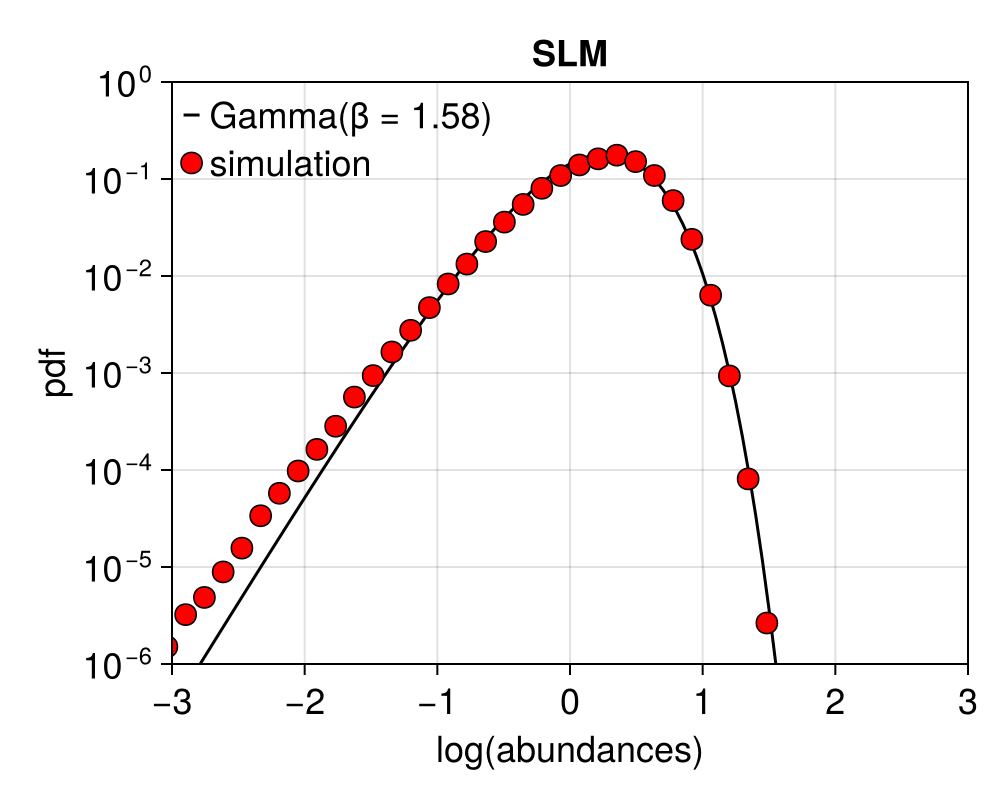

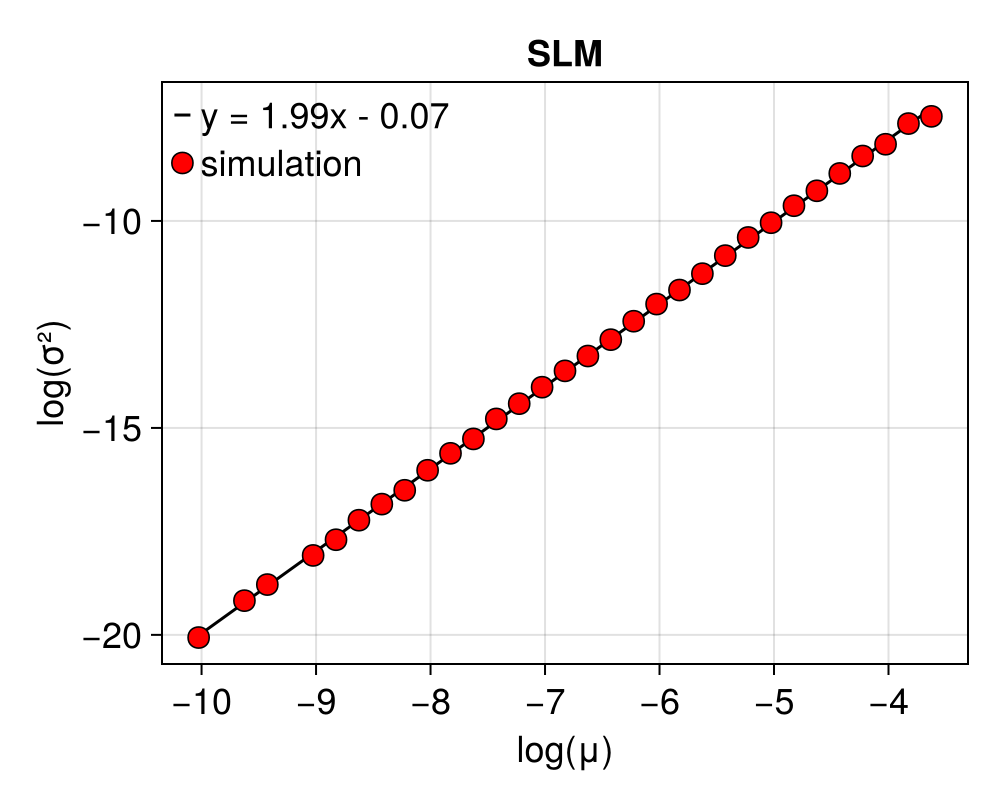

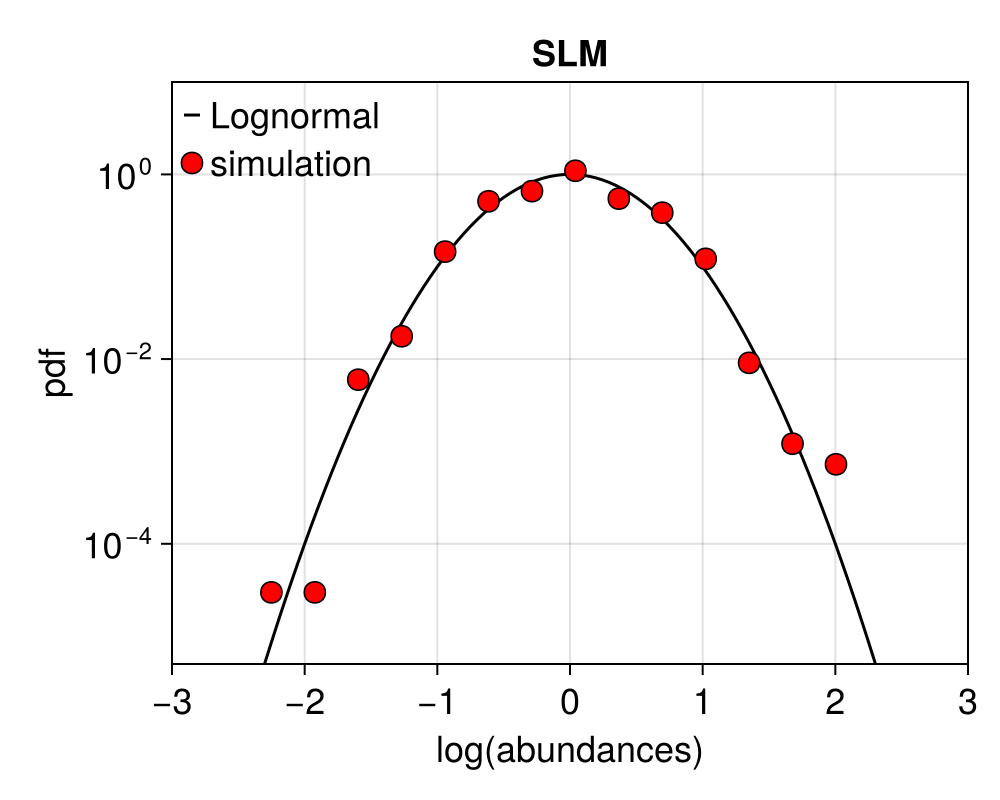

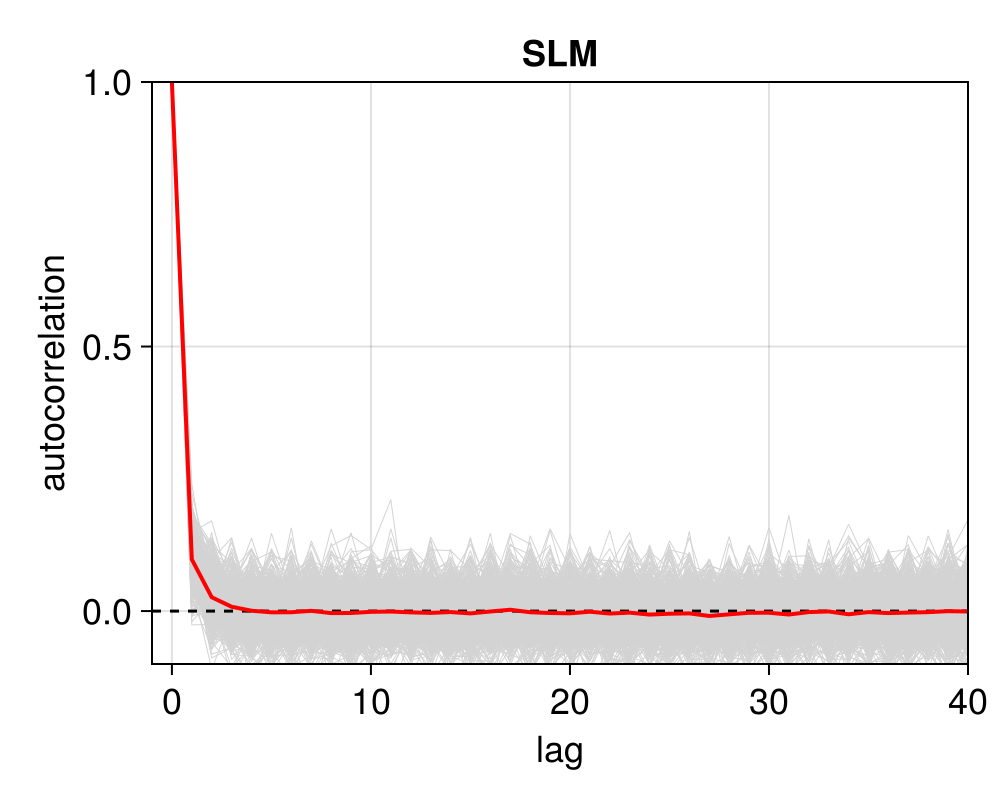

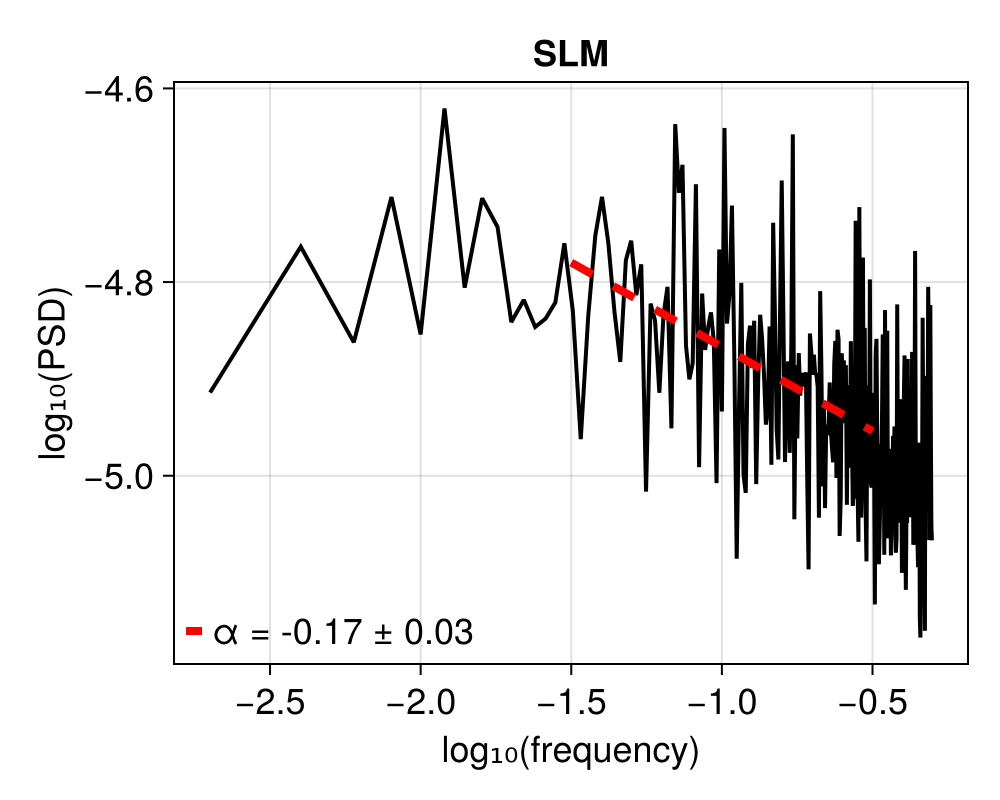

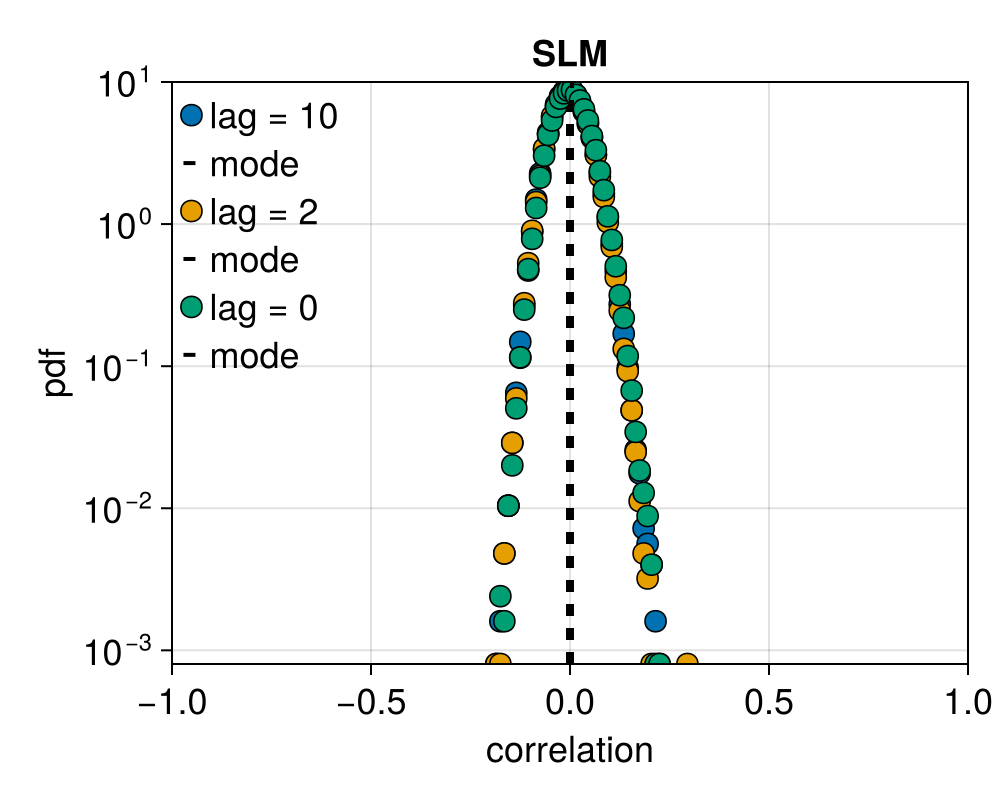

CairoMakie.Screen{IMAGE}


In [12]:
# Compute distributions
afd = MakeDistributions.make_AFD(data; missing_thresh = miss, Δb=0.2, env="SLM")
taylor = MakeDistributions.make_Taylor(data; missing_thresh = miss, Δb=0.2, env="SLM")
mad = MakeDistributions.make_MAD(data; Δb=0.5, missing_thresh = miss, env="SLM")
autocorr = MakeDistributions.make_lagCorr(data; missing_thresh = miss, max_lag = max_lag, env="SLM")
psd = MakeDistributions.make_PSD(data; missing_thresh = miss, freq_range=(-1.5, -0.5), env="SLM")
crosscorr = MakeDistributions.make_lagCrossCorr(data; lags=[10, 2, 0], missing_thresh = miss, env="SLM")

fig = Plots.combine_AFD_histograms([afd], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_Taylor_histograms([taylor], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_MAD_histograms([mad], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_autocorr_plots([autocorr], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_PSD_plots([psd], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_crossCorr_plots([crosscorr], nrows=1, ncols=1, Δb=0.01, fig_size=(500, 400), savepath=nothing)
display(fig)

### Stochastic Lotka Volterra

In [81]:
Random.seed!(1234)

# Set conditions for temporal analysis
K = 1000 .* rand(LogNormal(), N_species)
ρ = 1.0 / (N_species * log(N_species))
A = GenerativeModels.sparse_gaussian_matrix(K, ρ; μ=-2/N_species, σ=1/N_species)
println("Off-diagonals: ", count(.!iszero.(A)) - N_species)

# Solve model
data = GenerativeModels.lotka_volterra(N_species, K, Δt, n; r=1.0, A=Matrix(A), σ=1.0, ε=ε, skip=skip)
data ./= sum(data, dims=2)
println("Extincted species: ", count(iszero.(data[end,:])))

Off-diagonals: 88
Extincted species: 55


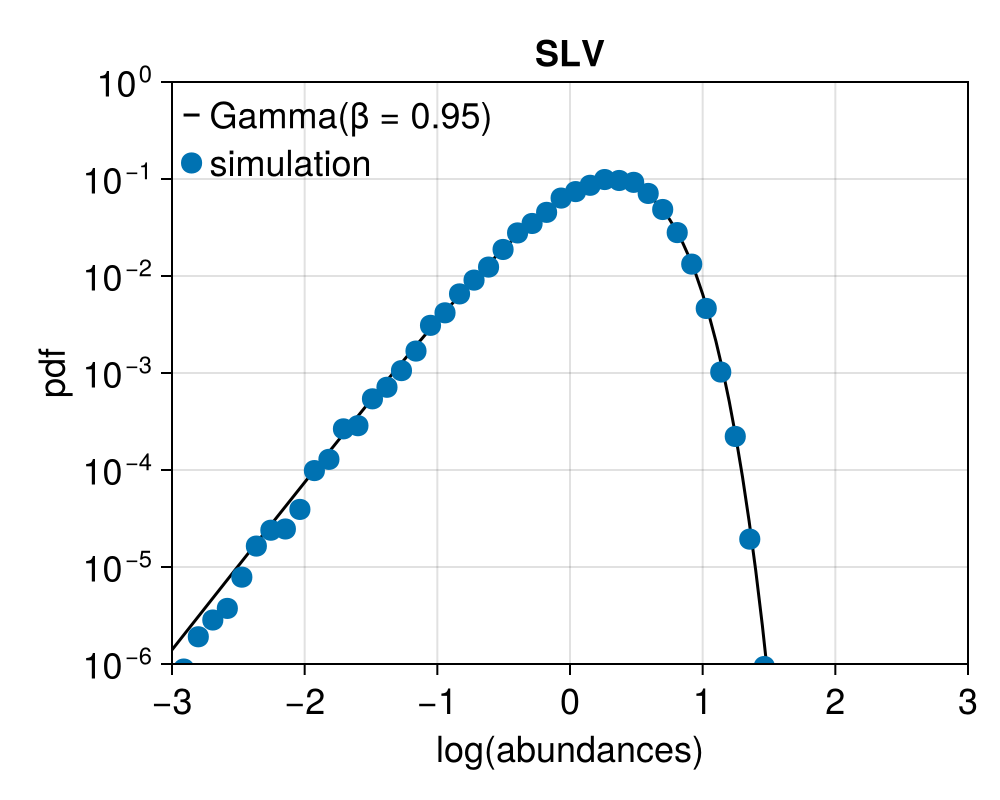

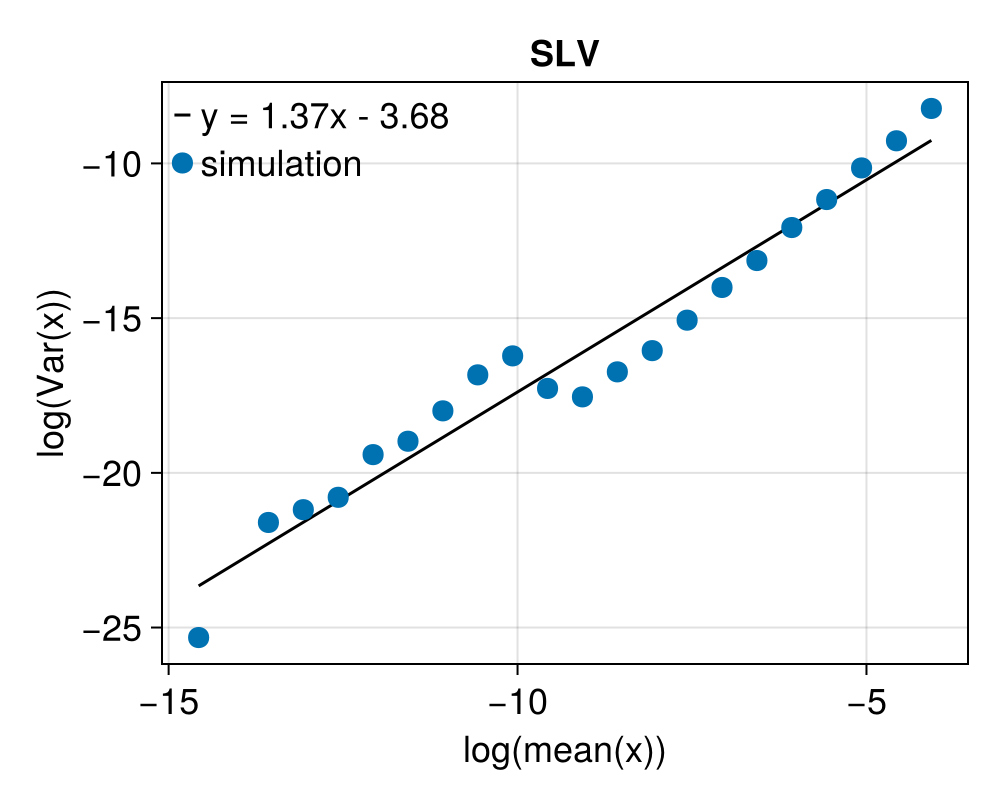

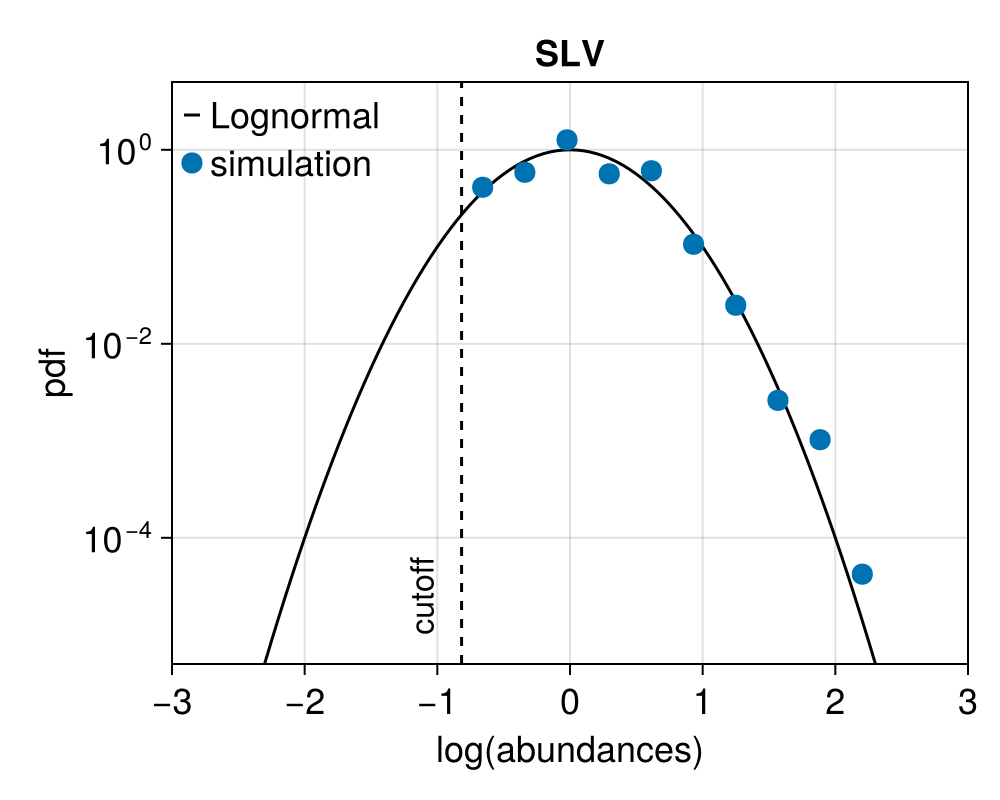

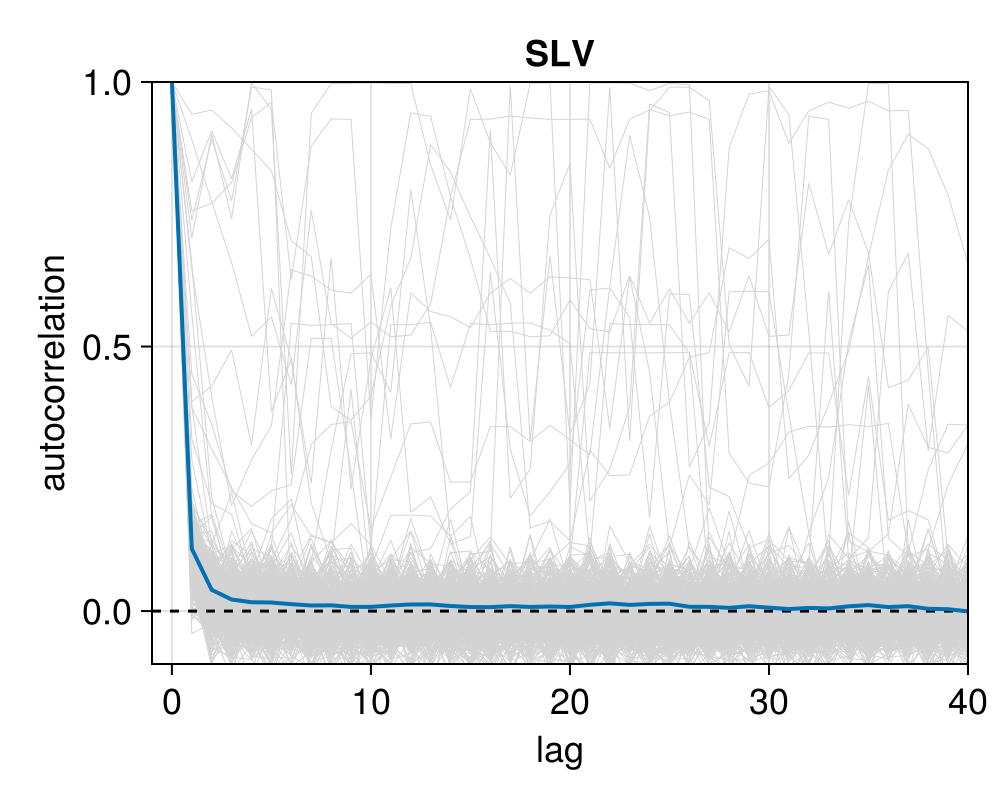

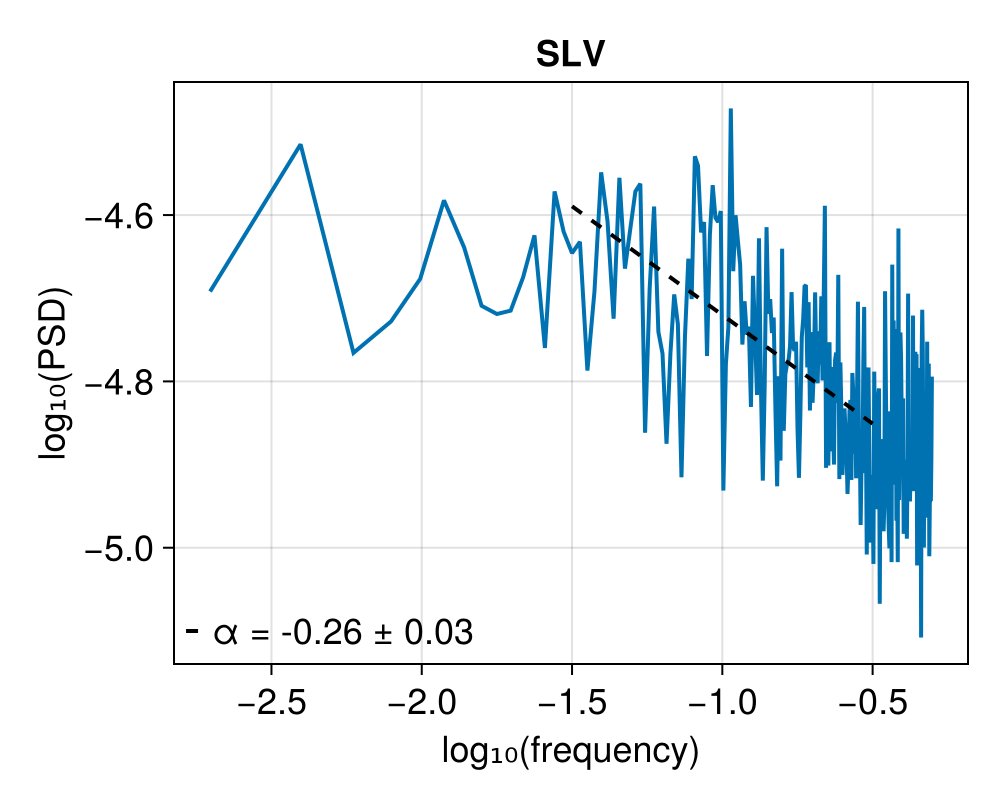

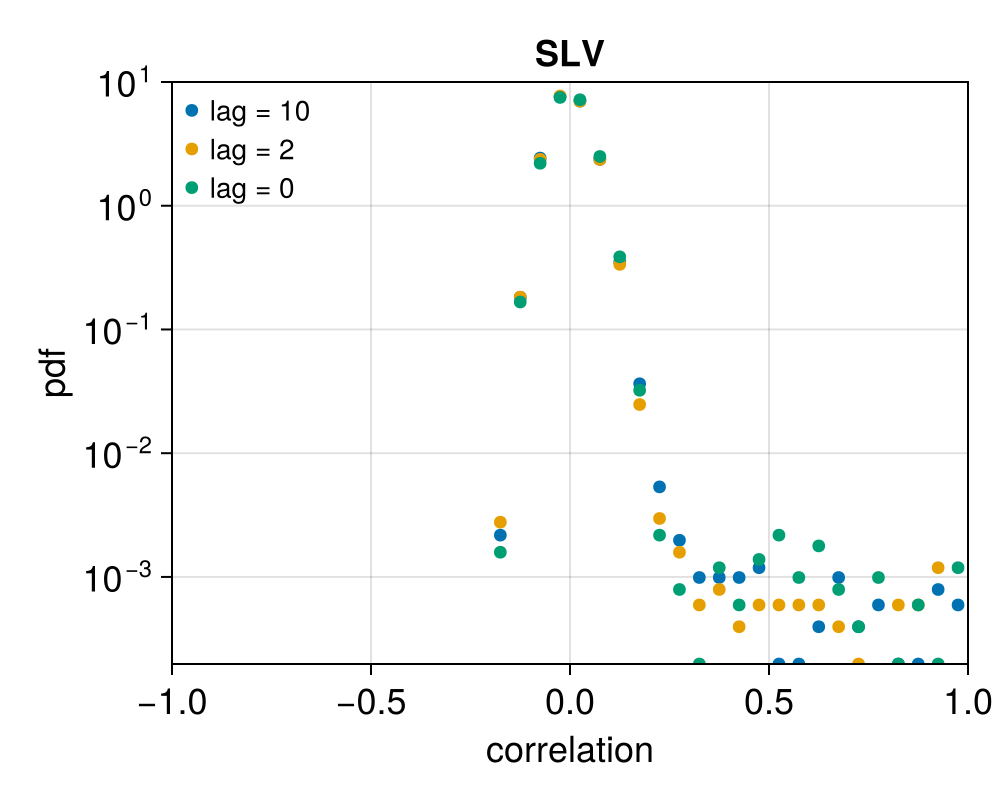

CairoMakie.Screen{IMAGE}


In [61]:
# Compute distributions
afd = MakeDistributions.make_AFD(data; missing_thresh = miss, Δb=0.3, env="SLV")
taylor = MakeDistributions.make_Taylor(data; Δb=0.5, env="SLV")
mad = MakeDistributions.make_MAD(data; missing_thresh = miss, Δb=0.5, env="SLV", c=exp(-8))
autocorr = MakeDistributions.make_lagCorr(data; missing_thresh = miss, max_lag = max_lag, env="SLV")
psd = MakeDistributions.make_PSD(data; missing_thresh = miss, freq_range=(-1.5, -0.5), env="SLV")
crosscorr = MakeDistributions.make_lagCrossCorr(data; lags=[10, 2, 0], missing_thresh = miss, env="SLV")

fig = Plots.combine_AFD_histograms([afd], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_Taylor_histograms([taylor], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_MAD_histograms([mad], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_autocorr_plots([autocorr], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_PSD_plots([psd], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_crossCorr_plots([crosscorr], nrows=1, ncols=1, Δb=0.05, fig_size=(500, 400), savepath=nothing)
display(fig)

### Statistical model

In [72]:
Random.seed!(1234)

# Set conditions for temporal analysis
mean_abs = rand(LogNormal(), N_species)

# Solve model
data = GenerativeModels.stat_model(N_species, n; β=1.0, mean_abs=mean_abs, ε=ε, skip=skip)
data ./= sum(data, dims=2)
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 0


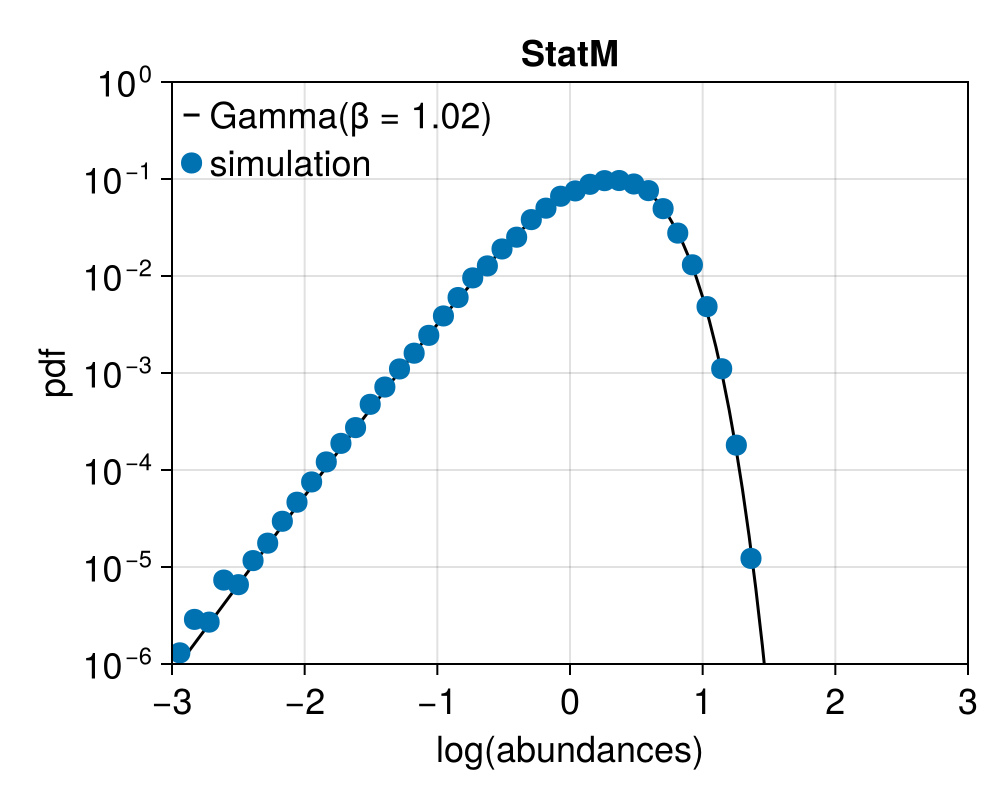

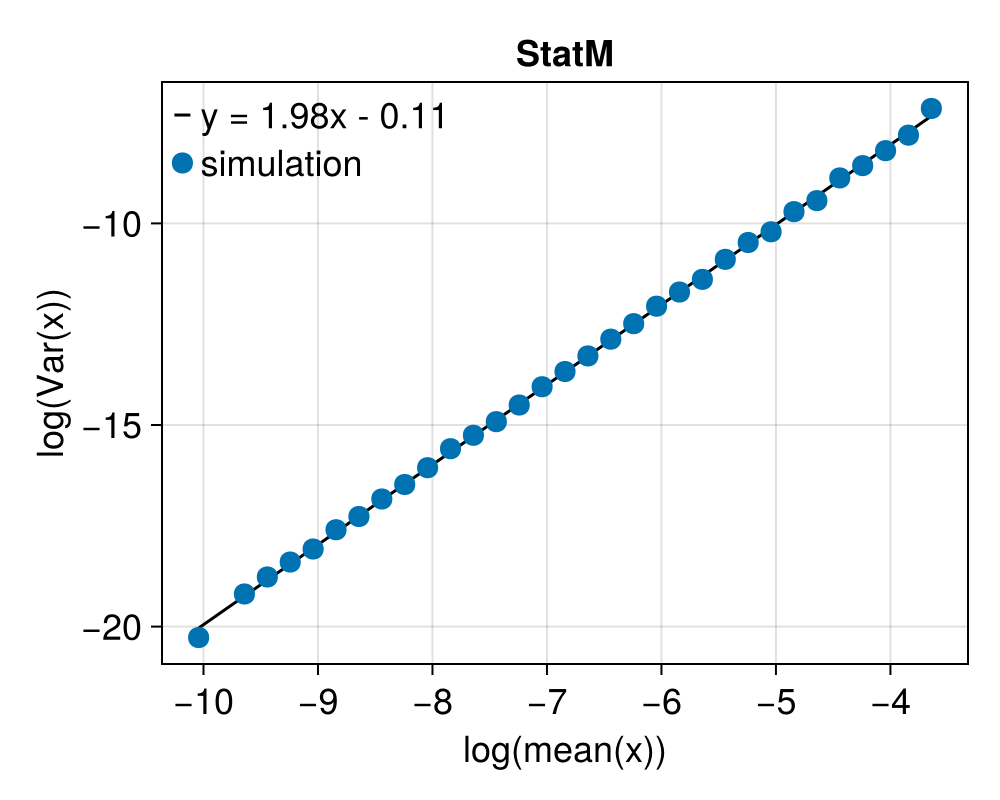

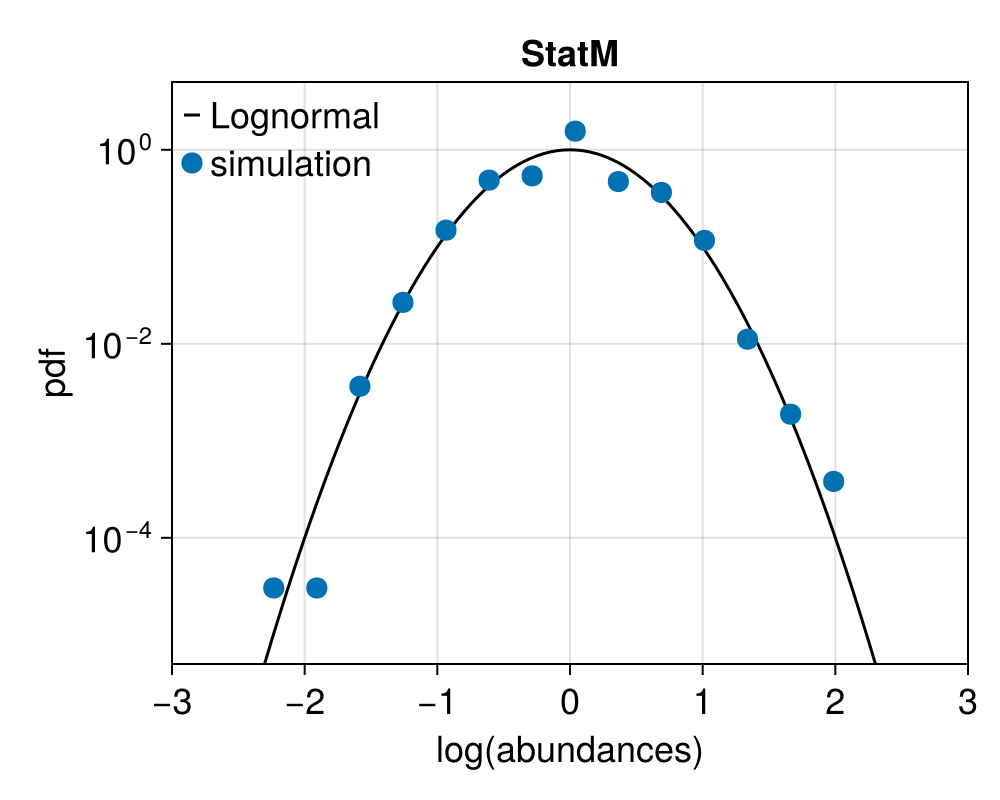

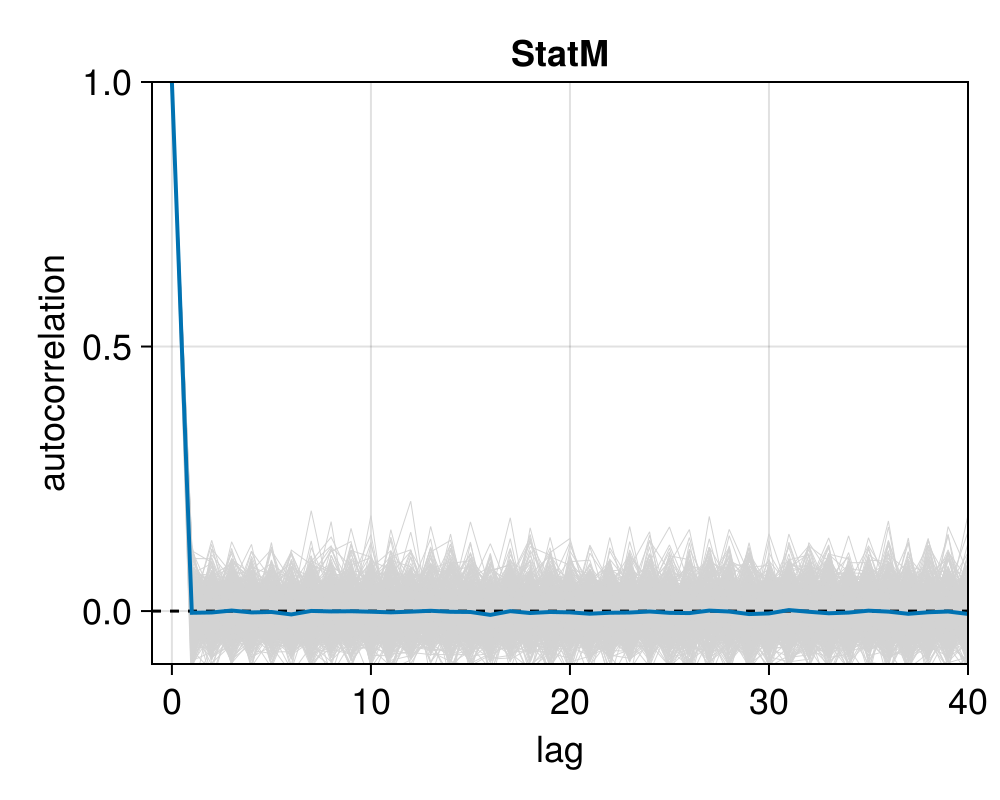

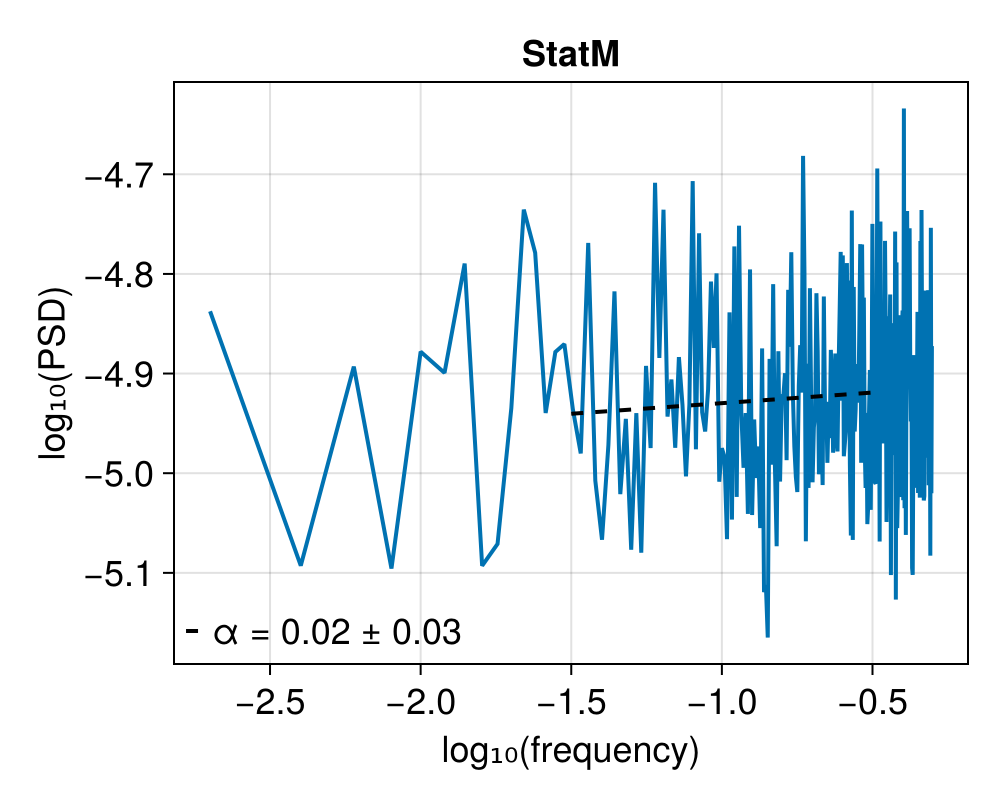

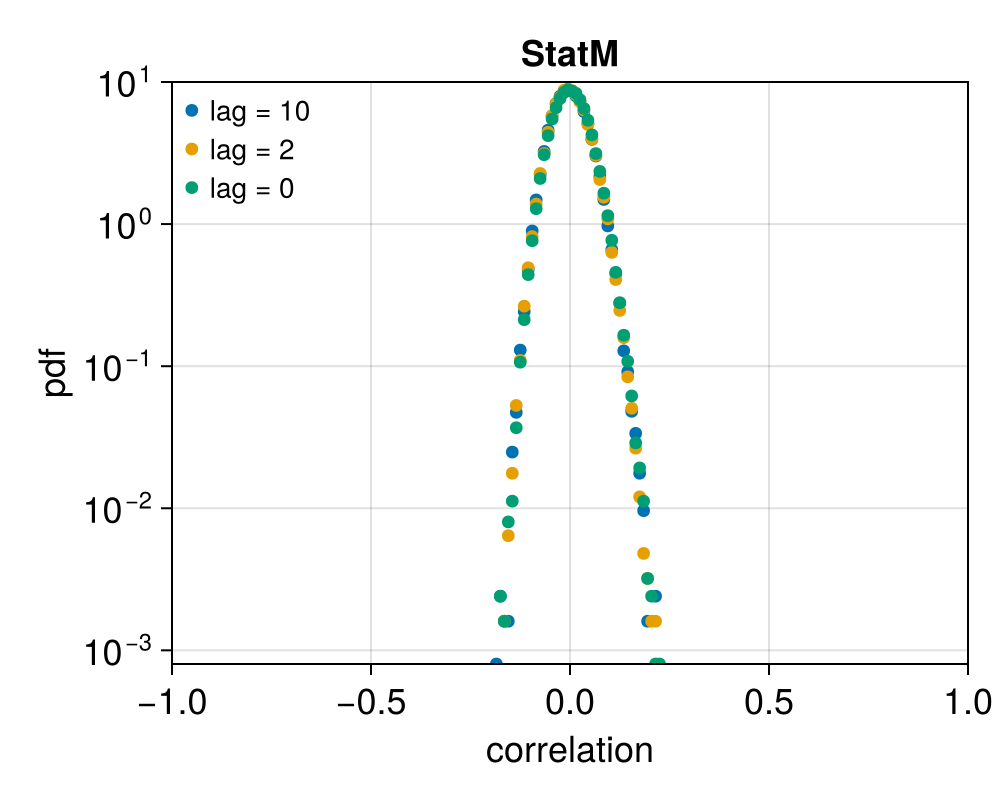

CairoMakie.Screen{IMAGE}


In [73]:
# Compute distributions
afd = MakeDistributions.make_AFD(data; missing_thresh = miss,  Δb=0.2, env="StatM")
taylor = MakeDistributions.make_Taylor(data; missing_thresh = miss,  Δb=0.2, env="StatM")
mad = MakeDistributions.make_MAD(data; missing_thresh = miss,  Δb=0.5, env="StatM")
autocorr = MakeDistributions.make_lagCorr(data; missing_thresh = miss, max_lag = max_lag, env="StatM")
psd = MakeDistributions.make_PSD(data; missing_thresh = miss, freq_range=(-1.5, -0.5), env="StatM")
crosscorr = MakeDistributions.make_lagCrossCorr(data; lags=[10, 2, 0], missing_thresh = miss, env="StatM")

fig = Plots.combine_AFD_histograms([afd], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_Taylor_histograms([taylor], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_MAD_histograms([mad], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_autocorr_plots([autocorr], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_PSD_plots([psd], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_crossCorr_plots([crosscorr], nrows=1, ncols=1, Δb=0.01, fig_size=(500, 400), savepath=nothing)
display(fig)

### Stochastic Exponential Growth

In [1]:
Random.seed!(1234)

# Set conditions for temporal analysis
y0 = 1000 .* rand(N_species)

# Solve model
data = GenerativeModels.exp_growth(N_species, y0, Δt, n; σ=1.0, p=0.0, ε=ε, skip=skip)
data ./= sum(data, dims=2)
println("Extincted species: ", count(iszero.(data[end,:])))

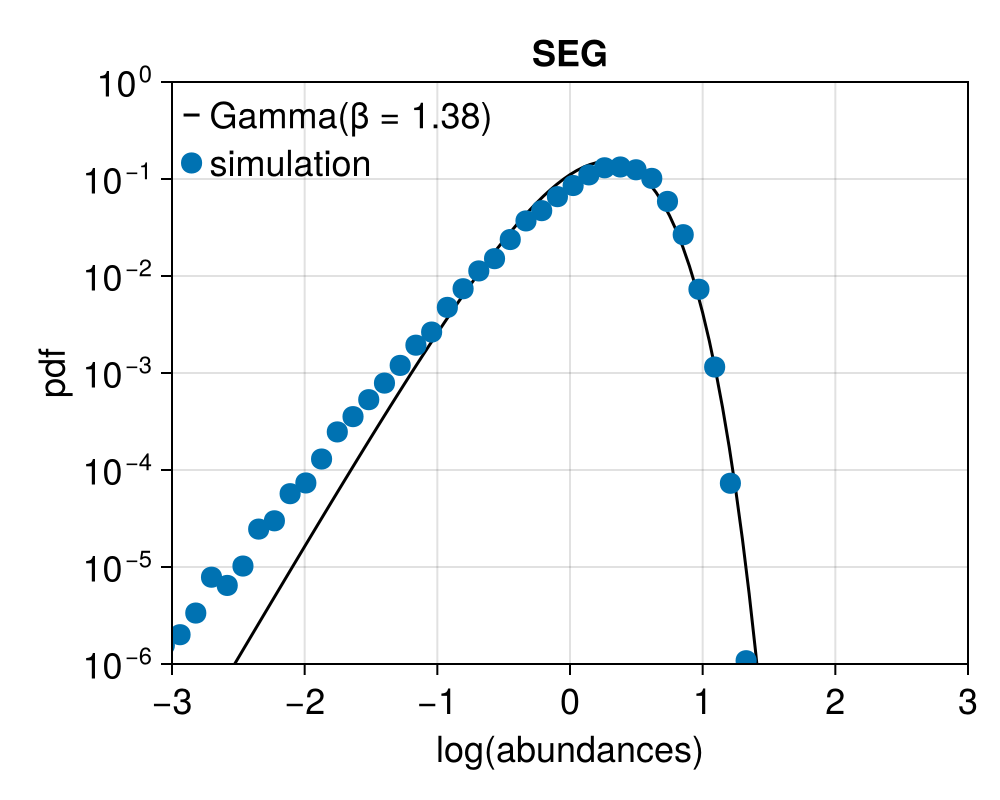

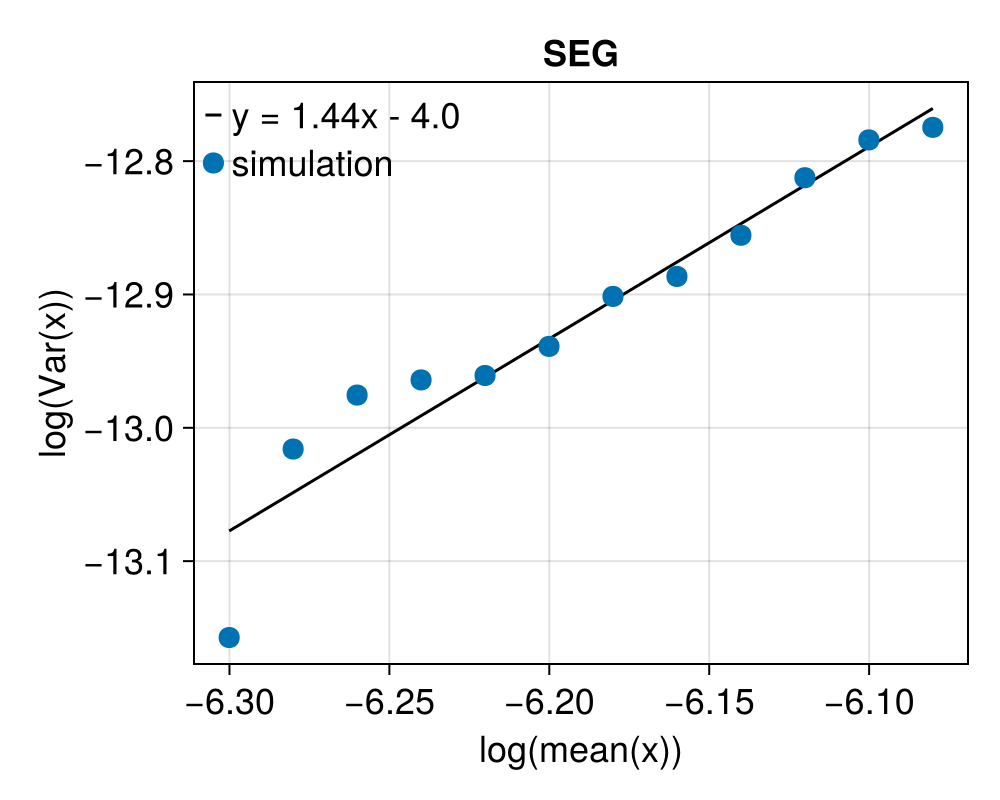

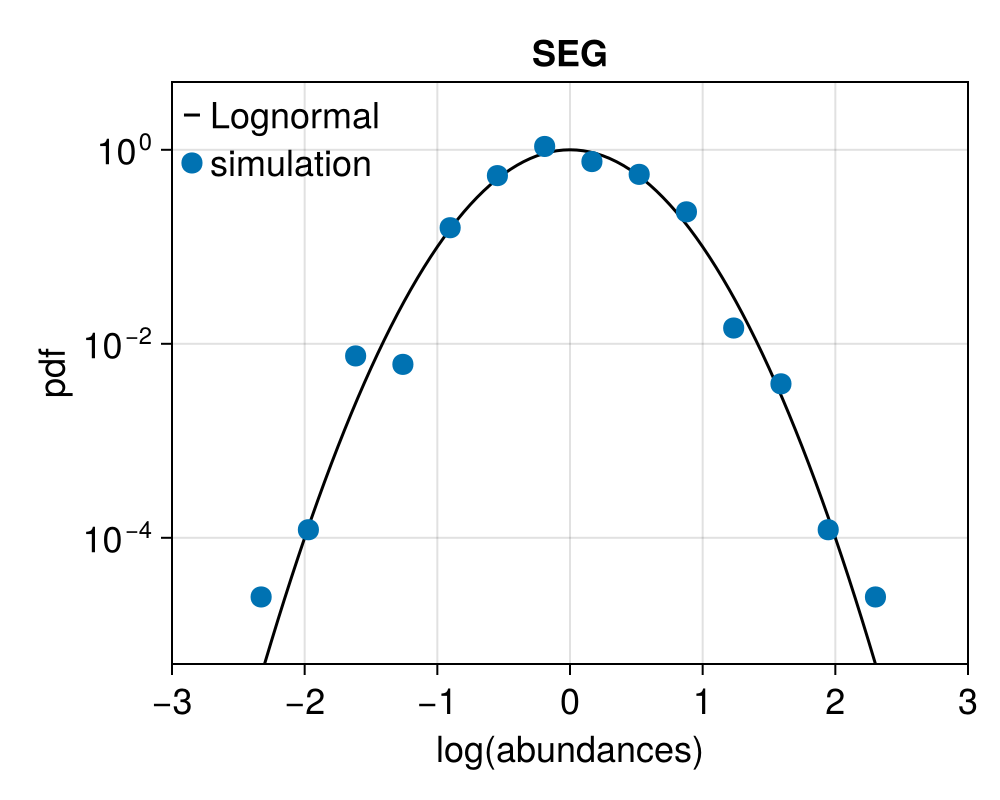

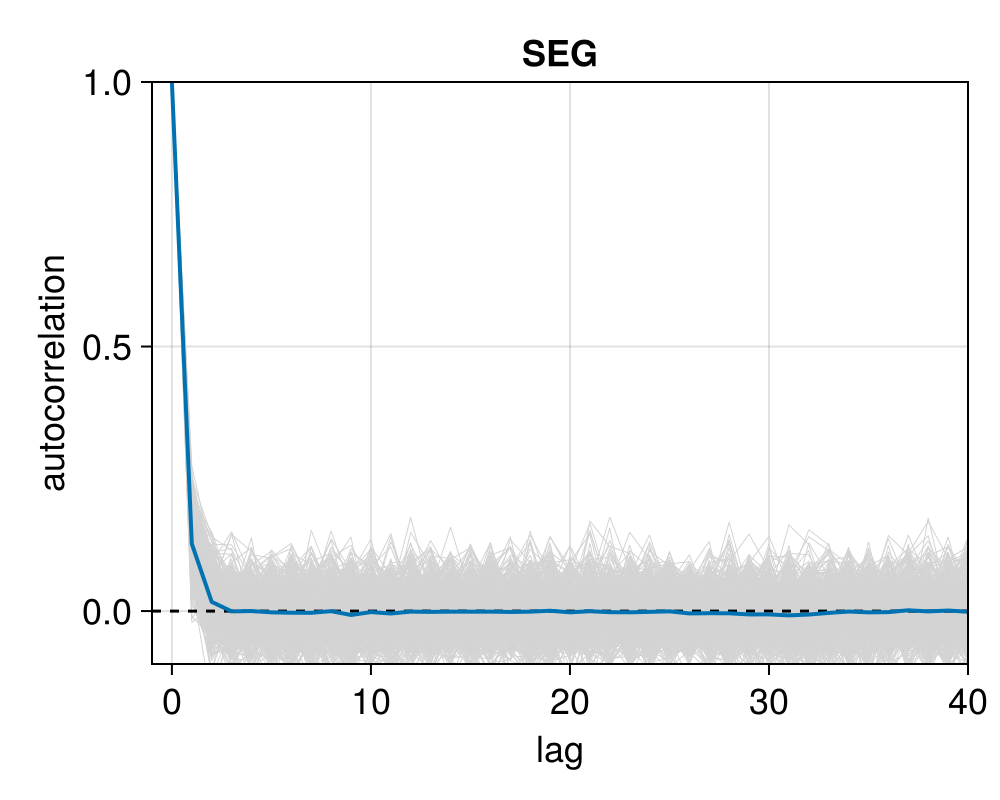

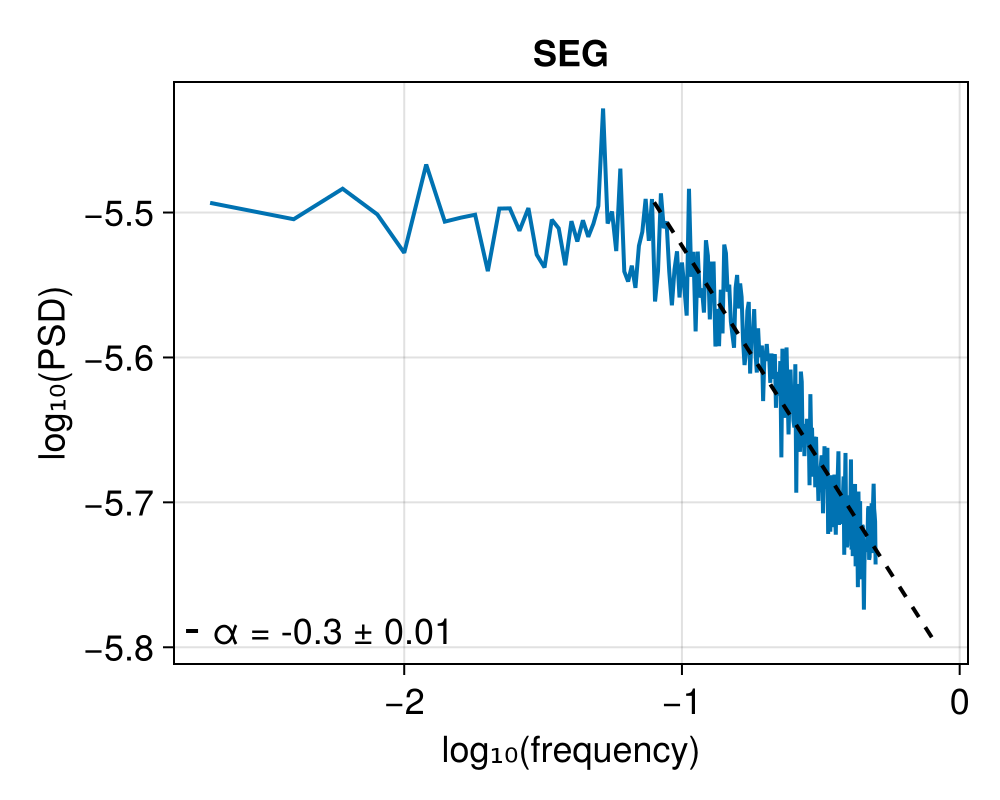

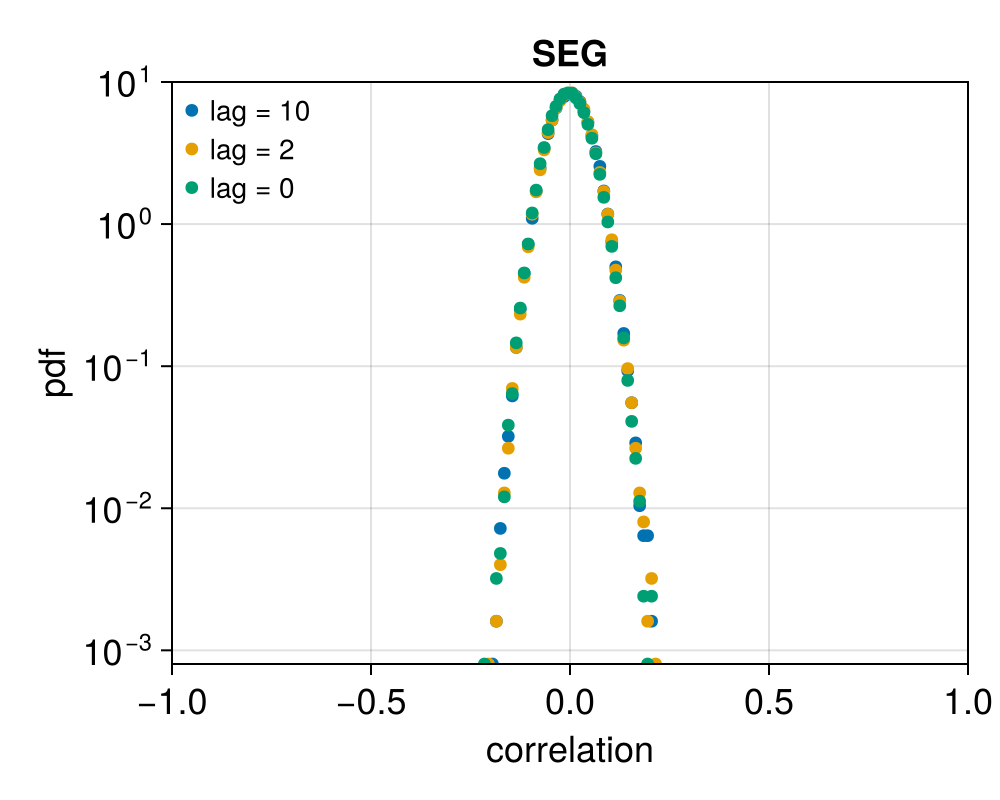

CairoMakie.Screen{IMAGE}


In [71]:
# Compute distributions
afd = MakeDistributions.make_AFD(data; missing_thresh = miss,  Δb=0.2, env="SEG")
taylor = MakeDistributions.make_Taylor(data; missing_thresh = miss,  Δb=0.02, env="SEG")
mad = MakeDistributions.make_MAD(data; missing_thresh = miss,  Δb=0.02, env="SEG")
autocorr = MakeDistributions.make_lagCorr(data; missing_thresh = miss, max_lag = max_lag, env="SEG")
psd = MakeDistributions.make_PSD(data; missing_thresh = miss, freq_range=(-1.1, -0.1), env="SEG")
crosscorr = MakeDistributions.make_lagCrossCorr(data; lags=[10, 2, 0], missing_thresh = miss, env="SEG")

fig = Plots.combine_AFD_histograms([afd], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_Taylor_histograms([taylor], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_MAD_histograms([mad], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_autocorr_plots([autocorr], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_PSD_plots([psd], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_crossCorr_plots([crosscorr], nrows=1, ncols=1, Δb=0.01, fig_size=(500, 400), savepath=nothing)
display(fig)

### OU exponential growth

In [79]:
Random.seed!(1234)

# Set conditions for temporal analysis
y0 = rand(N_species)
y0 ./= sum(y0)

# Solve model
data = GenerativeModels.OU_growth(N_species, y0, Δt, n; σ=0.1, ε=ε, skip=skip)
# data ./= sum(data, dims=2)
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 127


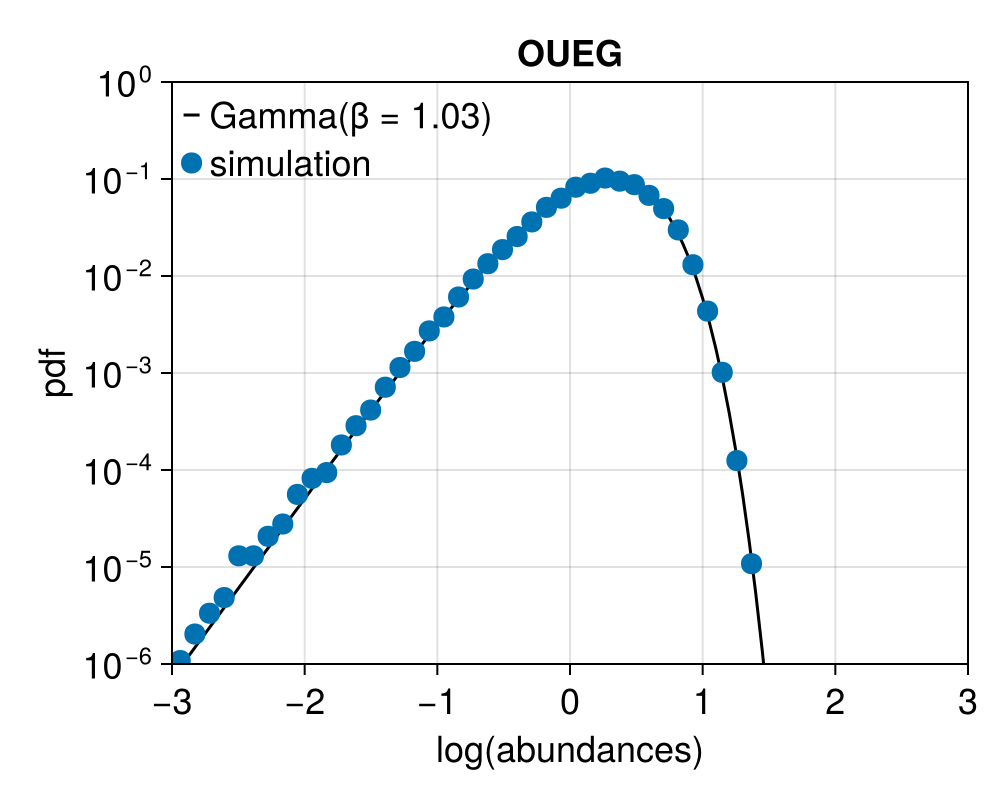

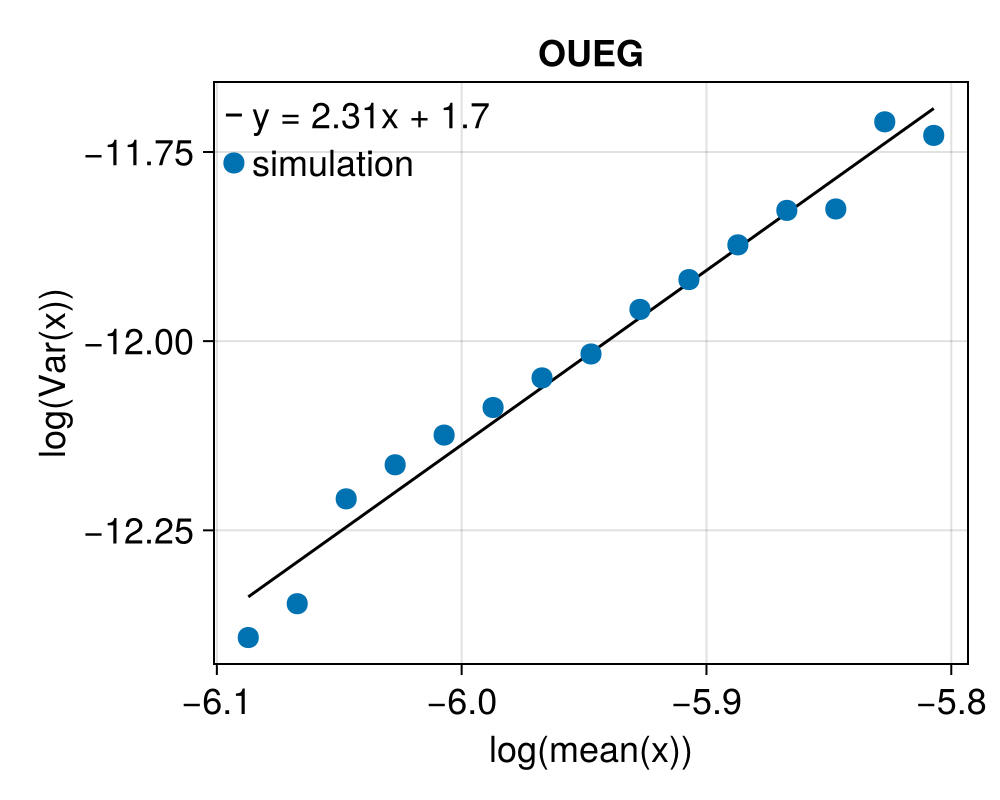

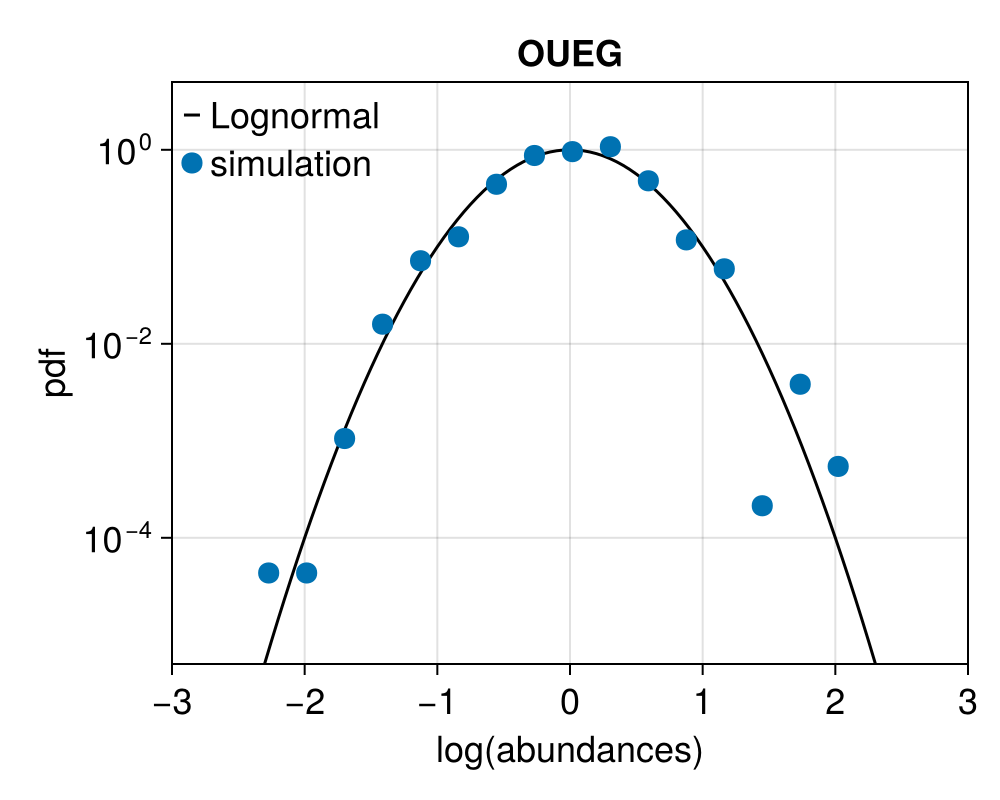

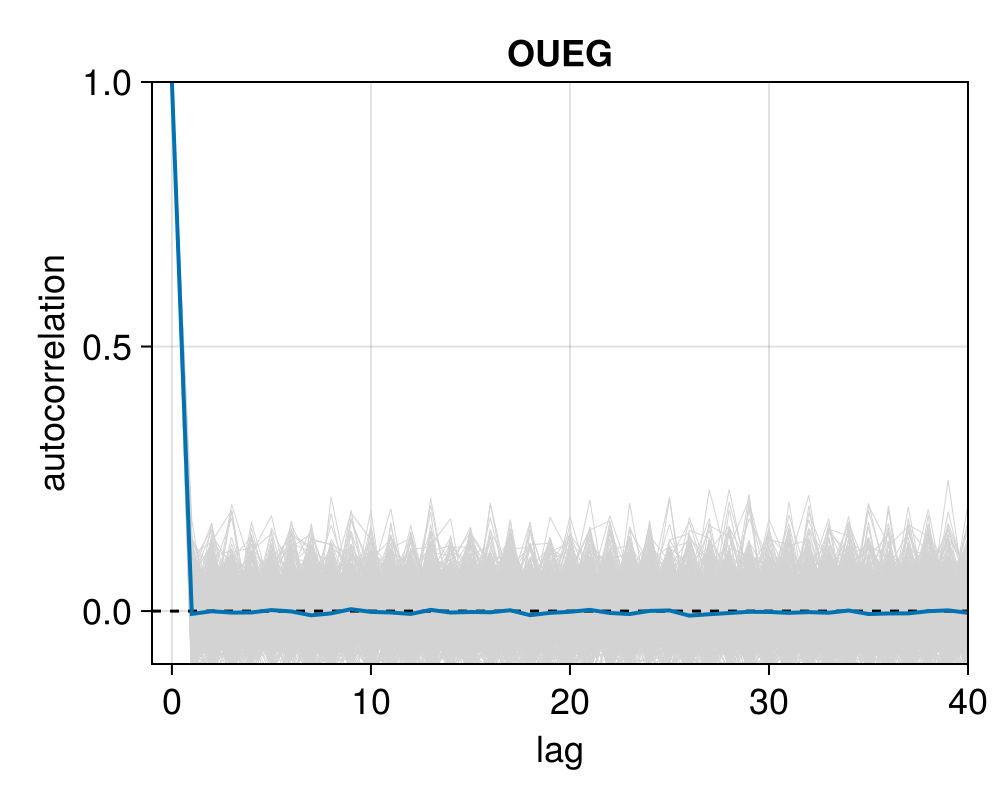

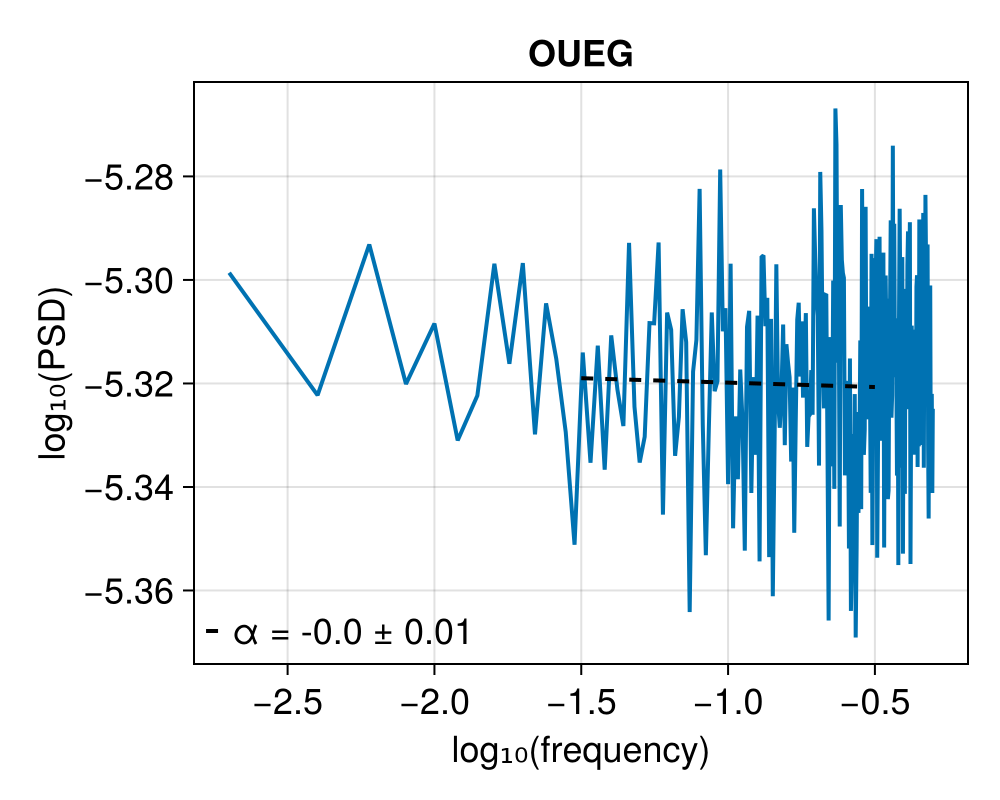

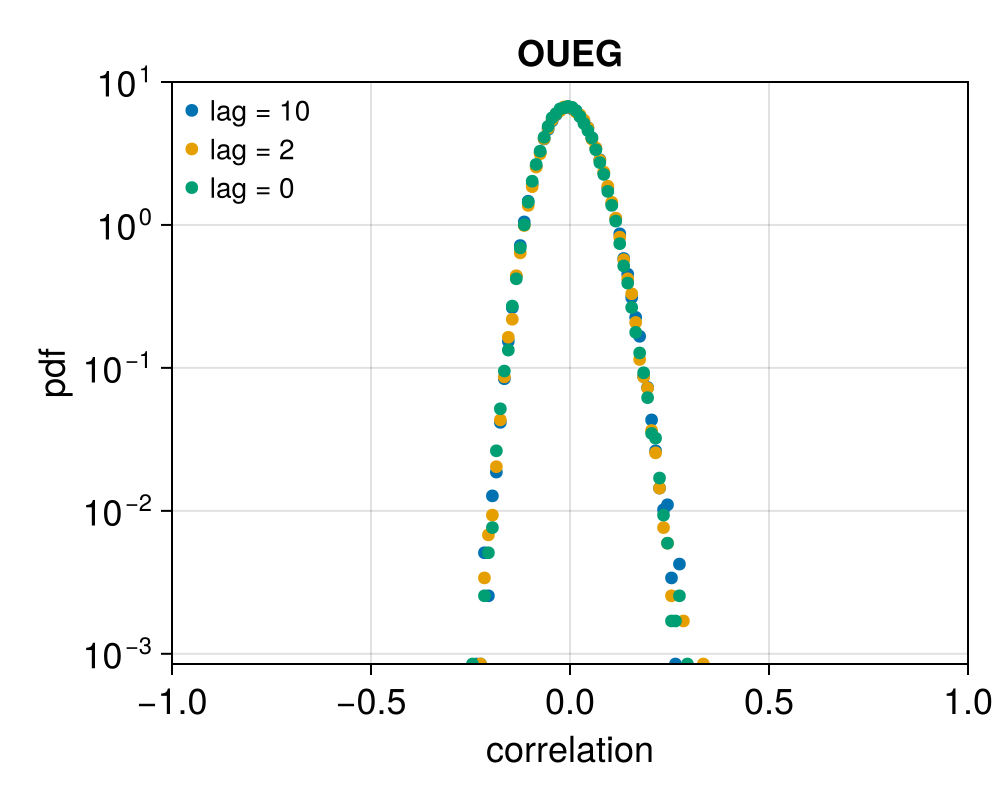

CairoMakie.Screen{IMAGE}


In [80]:
# Compute distributions
afd = MakeDistributions.make_AFD(data; missing_thresh = miss,  Δb=0.2, env="OUEG")
taylor = MakeDistributions.make_Taylor(data; missing_thresh = miss,  Δb=0.02, env="OUEG")
mad = MakeDistributions.make_MAD(data; missing_thresh = miss,  Δb=0.02, env="OUEG")
autocorr = MakeDistributions.make_lagCorr(data; missing_thresh = miss, max_lag = max_lag, env="OUEG")
psd = MakeDistributions.make_PSD(data; missing_thresh = miss, freq_range=(-1.5, -0.5), env="OUEG")
crosscorr = MakeDistributions.make_lagCrossCorr(data; lags=[10, 2, 0], missing_thresh = miss, env="OUEG")

fig = Plots.combine_AFD_histograms([afd], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_Taylor_histograms([taylor], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_MAD_histograms([mad], nrows=1, ncols=1, fig_size=(500, 400), data_label="simulation", savepath=nothing)
display(fig)

fig = Plots.combine_autocorr_plots([autocorr], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_PSD_plots([psd], nrows=1, ncols=1, fig_size=(500, 400), savepath=nothing)
display(fig)

fig = Plots.combine_crossCorr_plots([crosscorr], nrows=1, ncols=1, Δb=0.01, fig_size=(500, 400), savepath=nothing)
display(fig)